In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

Get the data from the file: ExSet4_Q1.npz. It contains observations f as a function
of time t. Plot up the function.

Text(0, 0.5, 'f')

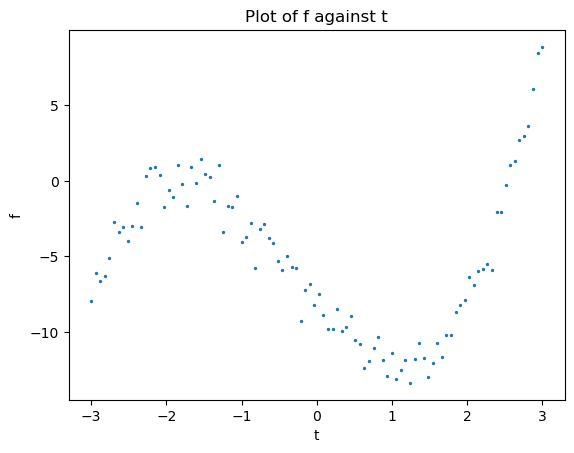

In [2]:
# import data
d = np.load('ExSet4_Q1.npz')

t, f = d['t'], d['f']

# plot
plt.scatter(t,f, s=2)
plt.title('Plot of f against t')
plt.xlabel('t')
plt.ylabel('f')

The data are described by a cubic function. Fit a cubic model to the data and plot
the best fit model. Although non-linear fitting will work, it is recommended that you
try this with a linear-least squares method (i.e. with linear basis models)

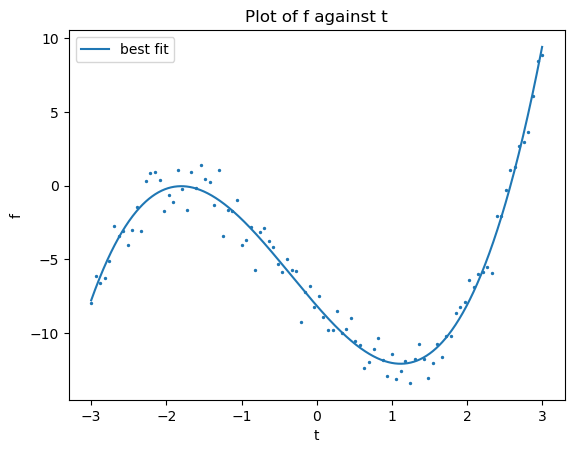

In [3]:
# best fit model
def cubic(theta, t):
    m = theta[0]*t**3 + theta[1]*t**2 + theta[2]*t + theta[3]
    return m
    
# define X
X = np.array([t**3, t**2, t, np.ones(t.size)]).T

# find best fit
theta = np.linalg.inv(X.T @ X) @ X.T @ f

# t for plotting
t_plotting = np.linspace(min(t), max(t), 1000)

model = cubic(theta, t_plotting)

plt.scatter(t,f, s=2)
plt.plot(t_plotting, model, label='best fit')
plt.title('Plot of f against t')
plt.xlabel('t')
plt.ylabel('f')
plt.legend()

Get the data from the file: ExSet4_Q2.npz. It contains observations f as a function
of time t. Plot up the data.

Text(0, 0.5, 'f')

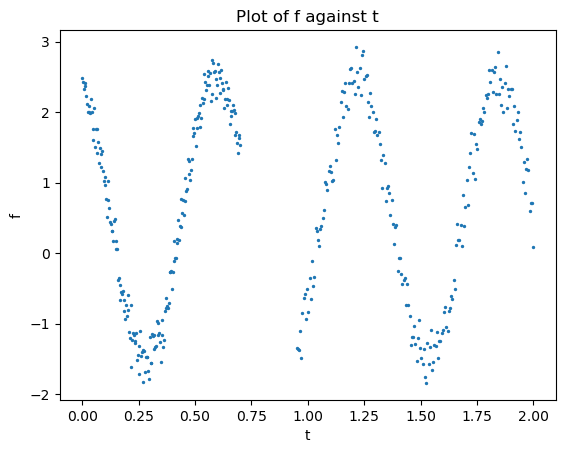

In [4]:
# import data
d = np.load('ExSet4_Q2.npz')

t, f = d['t'], d['f']

# plot
plt.scatter(t,f, s=2)
plt.title('Plot of f against t')
plt.xlabel('t')
plt.ylabel('f')

The data are described by a sinusoidal function with possible offset/phase change.
Fit the data and plot the best-fit model, interpolating to any gaps in the dataset.

for initial guess chi2 = 2418.327097866074
Optimization terminated successfully.
         Current function value: 14.248464
         Iterations: 179
         Function evaluations: 300
for fit chi2 = 14.248463653213221


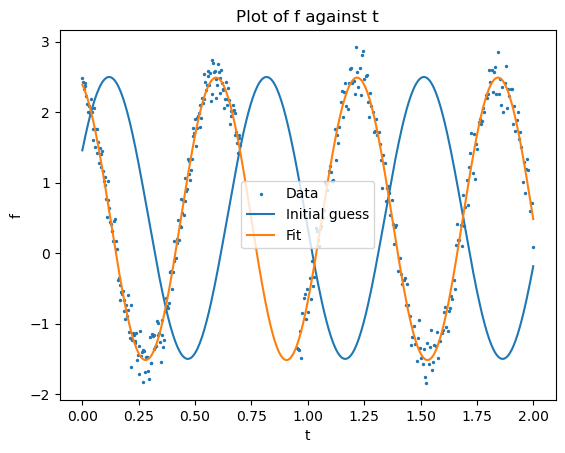

In [5]:
# model
def sin(p, t):
    # m = A sin(Bx + C) + D
    m = p[0] * np.sin(p[1]*t + p[2]) + p[3]
    return m

# merit function
def chi2(p, x, y, func):
    return np.sum((y - func(p,x))**2)


x = np.linspace(min(t), max(t), len(t))

# initial guess
p0 = np.array([2, 9, 0.5, 0.5])

# initial guesss chi^2
print("for initial guess chi2 =", chi2(p0, t, f, sin))

# fit
p_fit = opt.fmin(chi2, p0, (t, f, sin))
print("for fit chi2 =", chi2(p_fit, t, f, sin))

# plot
plt.scatter(t,f, s=2,label='Data')
plt.plot(x,sin(p0,x), label='Initial guess')
plt.plot(x,sin(p_fit,x), label='Fit')
plt.title('Plot of f against t')
plt.xlabel('t')
plt.ylabel('f')
plt.legend()

Estimate the uncertainties in f (assuming they are constant in time) and find the
uncertainties in the model parameters.

Function is f(t) = Asin(Bx+C) + D
A = -2.003727278239977 +- 0.07221667790727555
B = 10.051164633709377 +- 0.05607569950638829
C = -1.2511451701952332 +- 0.06183109140762136
D = 0.4874219720598325 +- 0.05086192822572901
Standard deviation of residuals = 0.18873567829230625


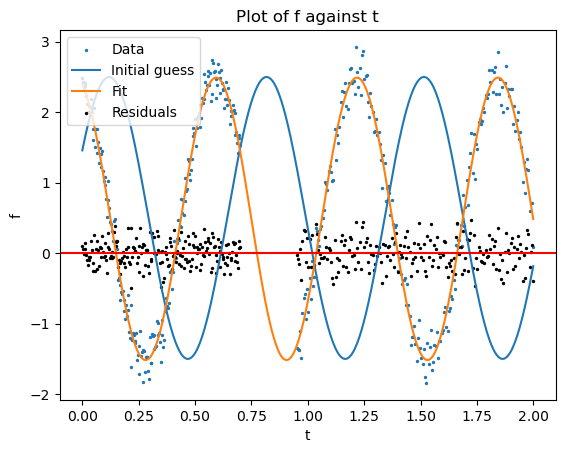

In [6]:
# residuals function
def residuals(p, func, x, y, s=1):
    return (y - func(p,x)) / s

# least squares
result = opt.least_squares(residuals, p0, args=(sin, t, f))

# get coefficients
p_fit = result.x

# plot
plt.scatter(t, f, s=2,label='Data')
plt.plot(x, sin(p0,x), label='Initial guess')
plt.plot(x, sin(p_fit,x), label='Fit')
plt.scatter(t, residuals(p_fit, sin, t ,f), s=2, label='Residuals', color='black')
plt.axhline(0,color='red')
plt.title('Plot of f against t')
plt.xlabel('t')
plt.ylabel('f')
plt.legend()

# get Hessian matrix
H = np.dot(result.jac.T,result.jac)

# get covariance matrix
K_fit = np.linalg.inv(H)

# take the sqrt of the diag to get stdevs
e_fit = np.sqrt(np.diag(K_fit))

print('Function is f(t) = Asin(Bx+C) + D')
print(f'A = {p_fit[0]} +- {e_fit[0]}')
print(f'B = {p_fit[1]} +- {e_fit[1]}')
print(f'C = {p_fit[2]} +- {e_fit[2]}')
print(f'D = {p_fit[3]} +- {e_fit[3]}')

sigma = np.std(residuals(p_fit, sin, t, f))

print(f'Standard deviation of residuals = {sigma}')

Get the data from the file: ExSet4_Q3.npz. It contains observations f as a function
of time t. Plot up the function.

Text(0, 0.5, 'f')

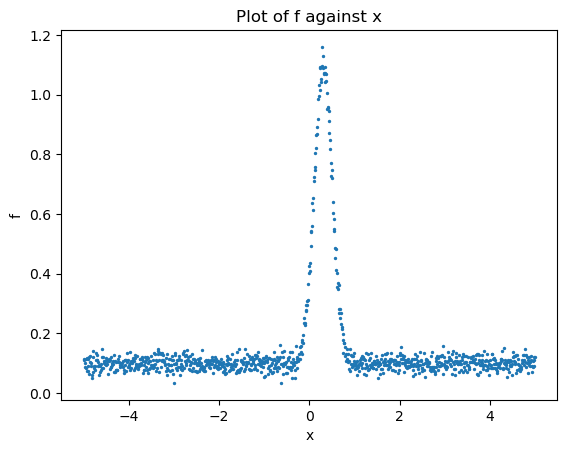

In [84]:
# import data
d = np.load('ExSet4_Q3.npz')

x, f = d['x'], d['f']

# plot
plt.scatter(x,f, s=2)
plt.title('Plot of f against x')
plt.xlabel('x')
plt.ylabel('f')

These data are described by a Gaussian (normal) distribution with a vertical offset.
Fit the data and plot the best-fit.

for initial guess chi2 = 332.45905024394847
Optimization terminated successfully.
         Current function value: 0.398066
         Iterations: 291
         Function evaluations: 494
for fit chi2 = 0.3980660084420031


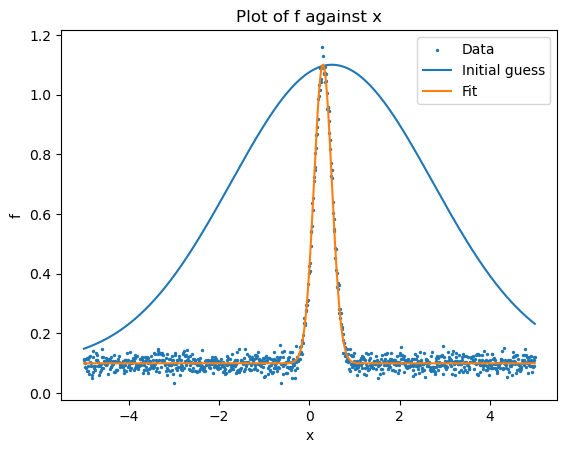

In [85]:
# model
def gauss(p, x):
    # m = A e^(Bx + C) + D
    m = p[0] * np.exp(-p[1]*(x + p[2])**2) + p[3]
    return m

# merit function
def chi2(p, x, y, func):
    return np.sum((y - func(p,x))**2)

x_plotting = np.linspace(min(x), max(x), 10000)

# initial guess
p0 = np.array([1, 0.1, -0.5, 0.1])

# initial guesss chi^2
print("for initial guess chi2 =", chi2(p0, x, f, gauss))

# fit
p_fit = opt.fmin(chi2, p0, (x, f, gauss))
print("for fit chi2 =", chi2(p_fit, x, f, gauss))

# plot
plt.scatter(x, f, s=2,label='Data')
plt.plot(x_plotting, gauss(p0, x_plotting), label='Initial guess')
plt.plot(x_plotting, gauss(p_fit, x_plotting), label='Fit')
plt.title('Plot of f against x')
plt.xlabel('x')
plt.ylabel('f')
plt.legend()

Estimate the uncertainties in f (assuming they are constant in time) and find the
uncertainties in the model parameters.

Function is f(t) = Asin(Bx+C) + D
A = 1.0006621524174193 +- 0.207848405537428
B = 12.669050826194441 +- 6.15529128860148
C = -0.2998921836126275 +- 0.04733836900255281
D = 0.09966864124355977 +- 0.033436212002775405
Standard deviation of residuals = 0.01995159162561583


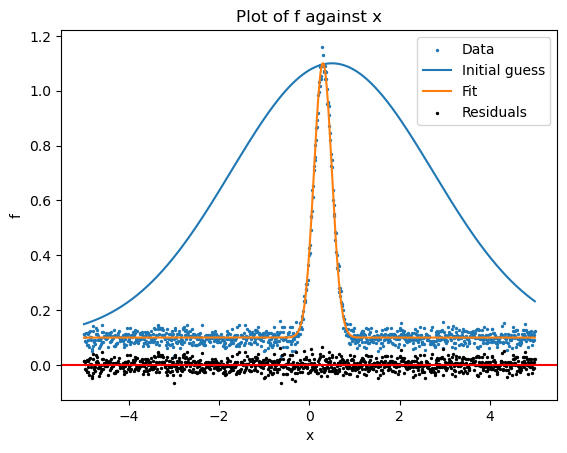

In [86]:
# least squares
result = opt.least_squares(residuals, p0, args=(gauss, x, f))

# plot
plt.scatter(x, f, s=2,label='Data')
plt.plot(x_plotting, gauss(p0, x_plotting), label='Initial guess')
plt.plot(x_plotting, gauss(p_fit, x_plotting), label='Fit')
plt.scatter(x, residuals(p_fit, gauss, x ,f), s=2, label='Residuals', color='black')
plt.axhline(0,color='red')
plt.title('Plot of f against x')
plt.xlabel('x')
plt.ylabel('f')
plt.legend()


# get Hessian matrix
H = np.dot(result.jac.T,result.jac)

# get covariance matrix
K_fit = np.linalg.inv(H)

# take the sqrt of the diag to get stdevs
e_fit = np.sqrt(np.diag(K_fit))

print('Function is f(t) = Asin(Bx+C) + D')
print(f'A = {p_fit[0]} +- {e_fit[0]}')
print(f'B = {p_fit[1]} +- {e_fit[1]}')
print(f'C = {p_fit[2]} +- {e_fit[2]}')
print(f'D = {p_fit[3]} +- {e_fit[3]}')

sigma = np.std(residuals(p_fit, gauss, x, f))

print(f'Standard deviation of residuals = {sigma}')

Get the data from the file: ExSet4_Q4.npz. It contains observations of a spectrum
as a function of wavelength $\lambda$ [called wl in the .npz file, in Angstrom], as well as a
spectral template s. Plot up the spectrum and the model template.

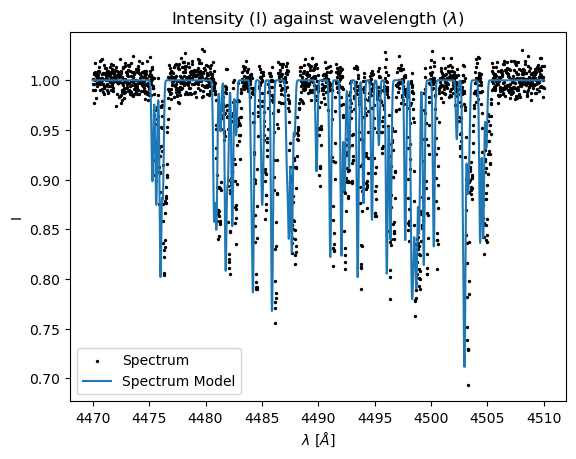

In [20]:
# import data
d = np.load('ExSet4_Q4.npz')

wl, v, s, f = d['wl'], d['v'], d['s'], d['f']

plt.scatter(wl, f, s=2, label='Spectrum', color='black')
plt.plot(wl, s, label='Spectrum Model')
plt.xlabel(r'$\lambda$ [$\AA$]')
plt.ylabel('I')
plt.title(r'Intensity (I) against wavelength ($\lambda$)')
plt.legend()

The dataset also contains the wavelength converted into a velocity scale v, with
zero-point roughly at the centre of the spectrum. Determine the cross-correlation of
the spectrum (data) with the model template as a function of velocity shift. Plot the
resulting cross-correlation function.

Text(0.5, 0, 'v')

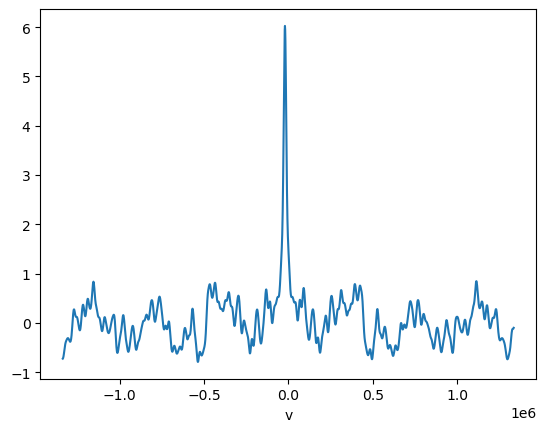

In [81]:
# means
mean_s = np.mean(s)
mean_f = np.mean(f)

# correlation function
corr = np.correlate(s-mean_s, f-mean_f, mode='same')

plt.plot(v, corr)
plt.xlabel('v')

Determine the velocity shift of the spectrum relative to the template? Can you find
an uncertainty in v?

for initial guess chi2 = 572.936906474122
Optimization terminated successfully.
         Current function value: 15.970001
         Iterations: 366
         Function evaluations: 629
for fit chi2 = 15.970000768650307
The velocity shift is 19879.130002768798 +- 3075.5352830775364 [units]


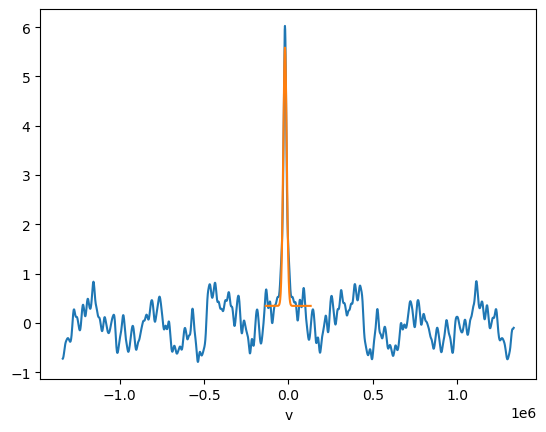

In [87]:
# initial guess for fitting
p0 = np.array([6, 1e-9, -2000, 0])

# fit only around the centre, v[a] - v[b]
a = int(len(v)/2 - 100)
b = int(len(v)/2 + 100)

# initial guesss chi^2
print("for initial guess chi2 =", chi2(p0, v[a:b], corr[a:b], gauss))

# fit
p_fit = opt.fmin(chi2, p0, (v[a:b], corr[a:b], gauss))
print("for fit chi2 =", chi2(p_fit, v[a:b], corr[a:b], gauss))

#plot
plt.plot(v, corr)
plt.plot(v[a:b], gauss(p_fit, v[a:b]))
plt.xlabel('v')

# velocity shift is peak
v_shift = p_fit[2]

# find this uncertainty
r = opt.least_squares(residuals, p0, args=(gauss, v[a:b], corr[a:b]))

# get Hessian matrix
H = np.dot(r.jac.T,r.jac)

# get covariance matrix
K_fit = np.linalg.inv(H)

# take the sqrt of the diag to get stdevs
e_fit = np.sqrt(np.diag(K_fit))

v_shift_unc = e_fit[2]

print(f'The velocity shift is {v_shift} +- {v_shift_unc} [units]')